In [ ]:
!pip install yfinance tensorflow scikit-learn numpy pandas deap

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

import matplotlib.pyplot as plt

mu = yf.download('MU', start='2014-01-01', end='2024-01-01')
#Forward fill for non-trading days
mu.fillna(method='ffill', inplace=True)
mu = mu[['Close']]

[*********************100%%**********************]  1 of 1 completed
<ipython-input-11-c65123b99840>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mu.fillna(method='ffill', inplace=True)


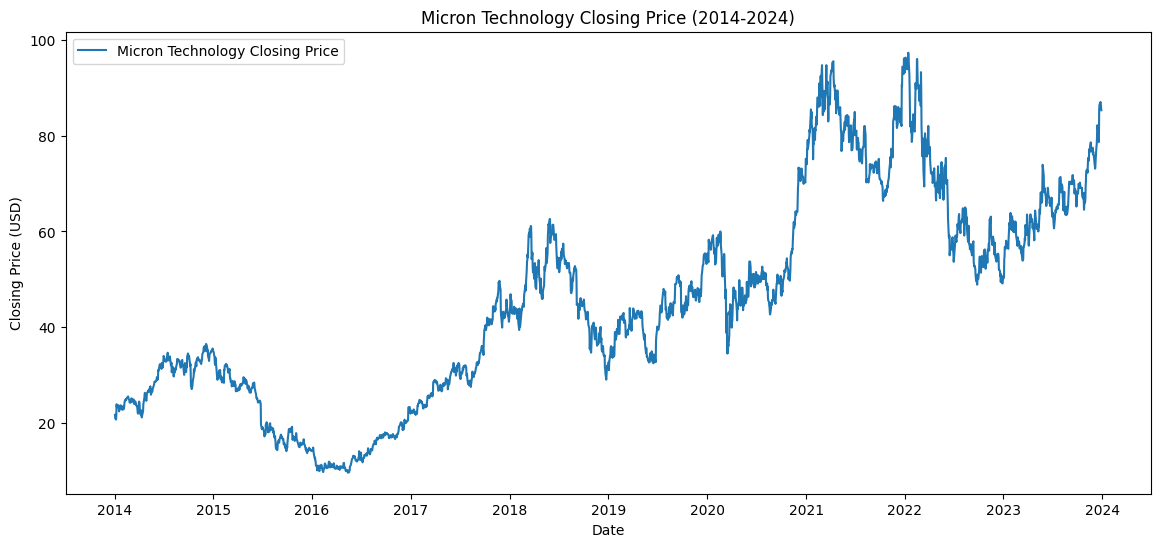

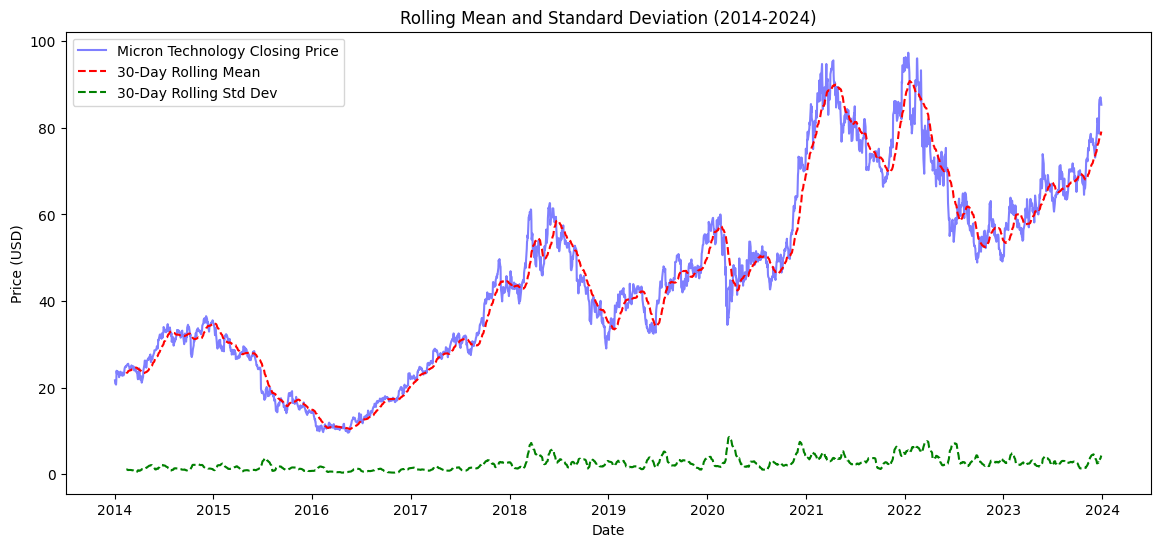

In [ ]:
import matplotlib.pyplot as plt

#Plot 1: Micron Closing Prices Over Time
plt.figure(figsize=(14, 6))
plt.plot(mu['Close'], label='Micron Technology Closing Price')
plt.title('Micron Technology Closing Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

#Plot 2: Rolling Mean and Standard Deviation
rmean = mu['Close'].rolling(window=30).mean()
rstd = mu['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(mu['Close'], label='Micron Technology Closing Price', color='blue', alpha=0.5)
plt.plot(rmean, label='30-Day Rolling Mean', color='red', linestyle='--')
plt.plot(rstd, label='30-Day Rolling Std Dev', color='green', linestyle='--')
plt.title('Rolling Mean and Standard Deviation (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(mu)

def create_dataset(data, window_size=60):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_dataset(scaled_data, window_size)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
tf.__version__

'2.17.0'

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense, Dropout


def build_and_compile_model(optimizer):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

#Reshape data to 3D for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#RMSProp
rmsprop_model = build_and_compile_model('rmsprop')
rmsprop_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

#Adam
adam_model = build_and_compile_model('adam')
adam_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0224 - val_loss: 0.0131
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.00

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE (RMSprop Optimizer): 2.786244818355213
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE (Adam Optimizer): 2.6799761519658873


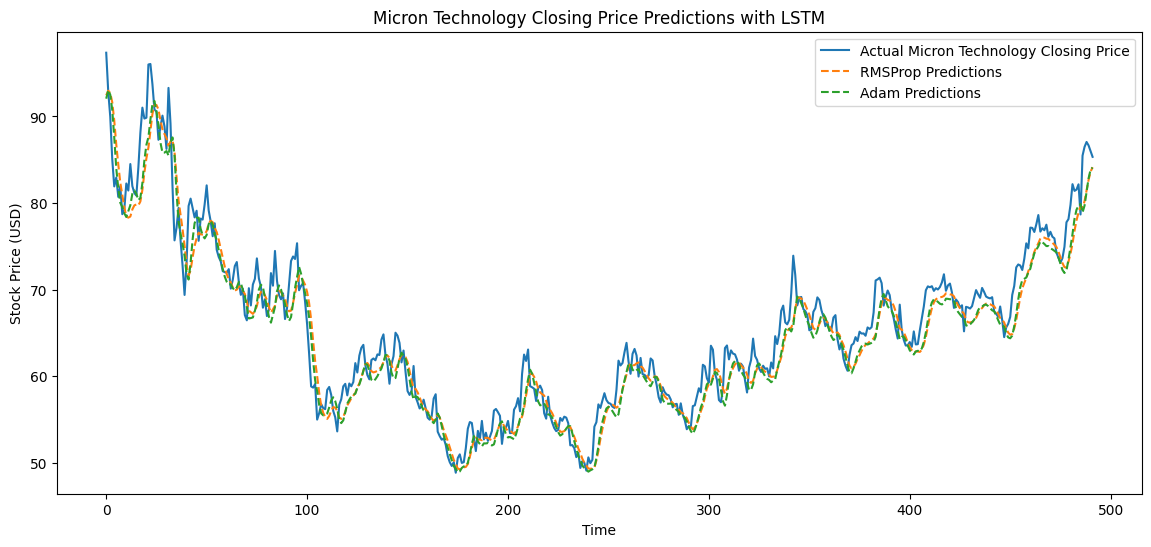

In [ ]:

from sklearn.metrics import mean_squared_error
import math

#predictions
pred_rmsprop = rmsprop_model.predict(X_test)
pred_adam = adam_model.predict(X_test)

#Inverse transform predictions and true values
pred_rmsprop = scaler.inverse_transform(pred_rmsprop)
pred_adam = scaler.inverse_transform(pred_adam)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

Y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
#Evaluate the RMSprop model
predicted_rmsprop = rmsprop_model.predict(X_test)
predicted_rmsprop = scaler.inverse_transform(predicted_rmsprop)
rmse_rmsprop = math.sqrt(mean_squared_error(Y_test_actual, predicted_rmsprop))
print(f"RMSE (RMSprop Optimizer): {rmse_rmsprop}")

#Evaluate the Adam model
predicted_adam = adam_model.predict(X_test)
predicted_adam = scaler.inverse_transform(predicted_adam)
rmse_adam = math.sqrt(mean_squared_error(Y_test_actual, predicted_adam))
print(f"RMSE (Adam Optimizer): {rmse_adam}")


#Plot predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test_scaled, label='Actual Micron Technology Closing Price')
plt.plot(pred_rmsprop, label='RMSProp Predictions', linestyle='--')
plt.plot(pred_adam, label='Adam Predictions', linestyle='--')
plt.title('Micron Technology Closing Price Predictions with LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


In [ ]:
#RMSProp
rmsprop_model = build_and_compile_model('rmsprop')
rmsprop_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

#Adam
adam_model = build_and_compile_model('adam')
adam_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0256 - val_loss: 0.0020
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - val_loss: 0.0059
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - val_loss: 0.0061
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - val_loss: 0.0061
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - val_loss: 0.0082
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - val_loss: 0.0135
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - val_loss: 0.0029

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE (RMSprop Optimizer): 4.654794942741866
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE (Adam Optimizer): 2.7441212608342123


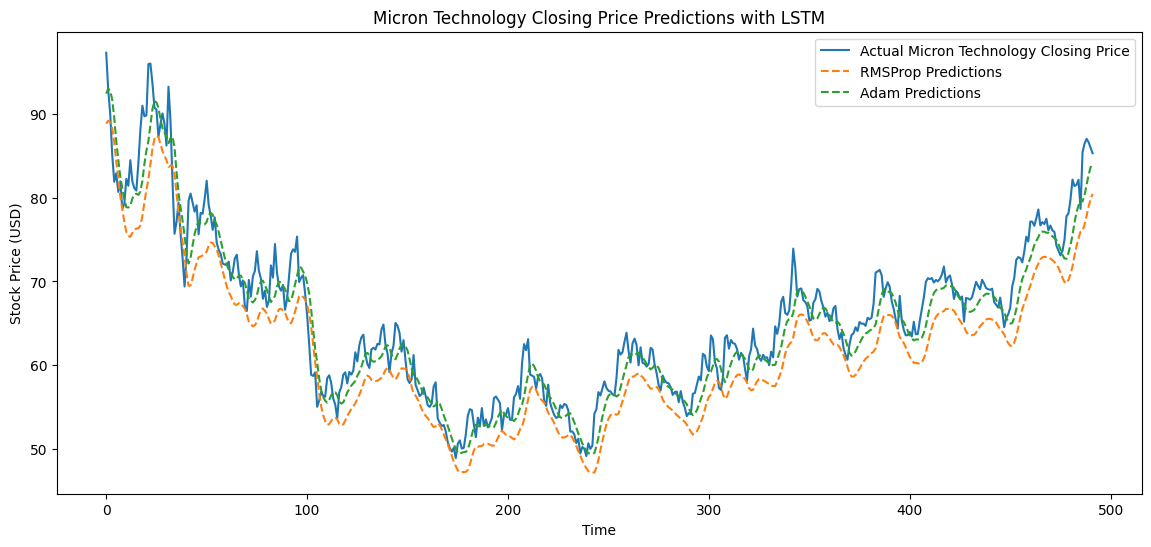

In [ ]:

from sklearn.metrics import mean_squared_error
import math

#predictions
pred_rmsprop = rmsprop_model.predict(X_test)
pred_adam = adam_model.predict(X_test)

#Inverse transform predictions and true values
pred_rmsprop = scaler.inverse_transform(pred_rmsprop)
pred_adam = scaler.inverse_transform(pred_adam)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

Y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
#Evaluate the RMSprop model
predicted_rmsprop = rmsprop_model.predict(X_test)
predicted_rmsprop = scaler.inverse_transform(predicted_rmsprop)
rmse_rmsprop = math.sqrt(mean_squared_error(Y_test_actual, predicted_rmsprop))
print(f"RMSE (RMSprop Optimizer): {rmse_rmsprop}")

#Evaluate the Adam model
predicted_adam = adam_model.predict(X_test)
predicted_adam = scaler.inverse_transform(predicted_adam)
rmse_adam = math.sqrt(mean_squared_error(Y_test_actual, predicted_adam))
print(f"RMSE (Adam Optimizer): {rmse_adam}")


#Plot predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test_scaled, label='Actual Micron Technology Closing Price')
plt.plot(pred_rmsprop, label='RMSProp Predictions', linestyle='--')
plt.plot(pred_adam, label='Adam Predictions', linestyle='--')
plt.title('Micron Technology Closing Price Predictions with LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


To predict future stock price of Micron Technology

In [ ]:
#Reshape entire dataset
X_all, y_all = create_dataset(scaled_data, window_size)

#Reshape to 3D input shape for LSTM
X_all = np.reshape(X_all, (X_all.shape[0], X_all.shape[1], 1))

#Train the model with entire dataset with Adam optimizer
adam_model = build_and_compile_model('adam')
adam_model.fit(X_all, y_all, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0295
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017
Epoch 16/50
77/77 ━━━━━━━━━━━

In [ ]:
from datetime import datetime, timedelta
#Predict future prices (one week - 5 days as stock market is closed on Sat&Sun)
#n_future =30


#For future predictions, please keyin the start and end date which you want to predict
from_date = datetime(2024, 8, 1)
to_date = datetime(2024, 8, 15)

#Calculate the number of future days
n_future = (to_date - from_date).days

future_predictions = []

#Start with the last window of the data
last_window = X_all[-1]

for _ in range(n_future):
    next_prediction = adam_model.predict(last_window.reshape(1, window_size, 1))
    future_predictions.append(next_prediction[0, 0])
    last_window = np.append(last_window[1:], next_prediction, axis=0)

#Inverse transform the predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

#Create a new DataFrame for the future dates
last_date = mu.index[-1]
future_dates = pd.date_range(last_date, periods=n_future+1, freq='B')[1:]  #'B' frequency for business days only

future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


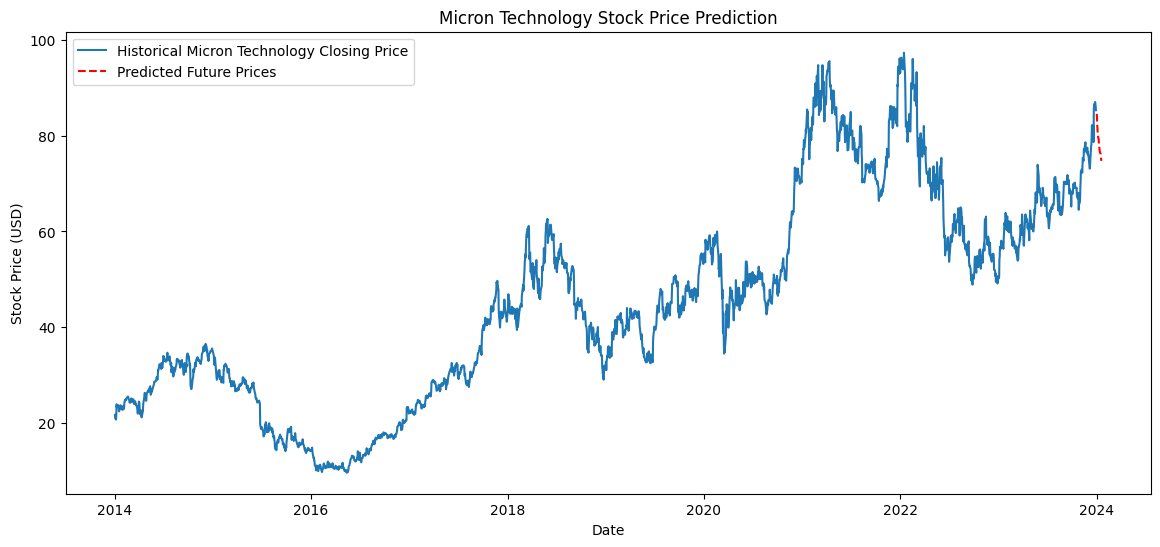

In [ ]:
#Future predictions along with historical data
plt.figure(figsize=(14, 6))
plt.plot(mu['Close'], label='Historical Micron Technology Closing Price')
plt.plot(future_df, label='Predicted Future Prices', linestyle='--', color='red')
plt.title('Micron Technology Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()
